## Introduction 

In this project, we will being using customer shoper data to help categorize our customers to help with targeted advertising and recommendations. Identifying distinct groups within our customers helps businesses tailor their marketing strategeies to improve customer satisfaction and product offerings. We will do this by using a KMeans model to cluster the customers together. We will then compare this model to other popular clustering models to see how they compare. 

#### Goal

The goal of this project is to take customer data and use an unsupervised machine learning model to categorize the customers into groups.

## Exploratory Data Analysis (EDA)

The dataset we will be using is called Mall_Customers.csv and can be found here https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data. The dataset contains demographic and spending information about our customer. Some of the information includes age, annual income, and spending score. A list of all the information in the data set is below. 

* Customer ID: Unique identifier assigned to each customer
* Gender: Male or Female
* Age: Age of Customer
* Annual Income (k$): Annual income of the custormer in US dollars
* Spending Score: Score given to customer based on spending habits


#### Inspection 

Now we need to inspect our data and see what we are working with. First lets load our important packages and then we will start looking through the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

Now we need to load the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

Lets take a quicklook at the data set and see what were are looking at.

In [3]:
print("Data Overview:")
print(df.shape)
print(df.head())


Data Overview:
(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


So we have 200 rows of data

Now lets look at what each data type is. 

In [4]:
print("Data Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


#### Data Clean up

An important step in any EDA phase is to clean up our data and make sure we handle missing values. Lets check how many missing values we have. 

In [5]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


So we have no missing data. So, there is no need to clean up the data. 

#### Visualization 

Now we need to visualize the data. We do this because it can give us important insights into the data that would otherwise be hard to figure out. We will first look at the distributions in the data and then we will  look at correlation heatmaps to understand our data better. 

Below is the code for the first visualization. We are going to look at the distribution for each factor. We are not going to be able to look at the distribution of profession in the visualization below. 

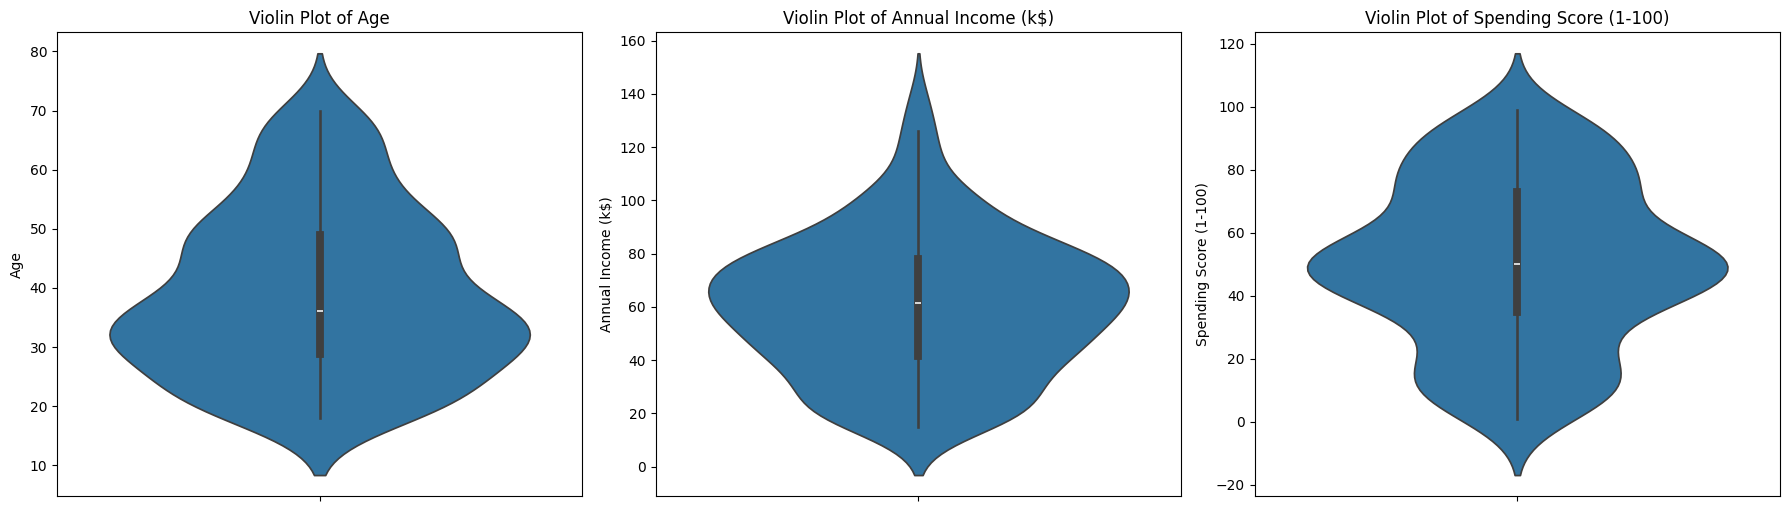

In [6]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.violinplot(y=df[col], ax=axes[i], inner='box')
    axes[i].set_title(f'Violin Plot of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Overall the distribution in the data makes sense. The age range is mostly in the 30-40 age region and tapers off near the ends which makes sense for a typical shopper. The Annual income also makes sense with the distribution gradually increasing then starts to taper off near the top end and lower ends. The spending score is well distributed and most people are in the 40-60 range. 

Now lets look at the gender distribution 

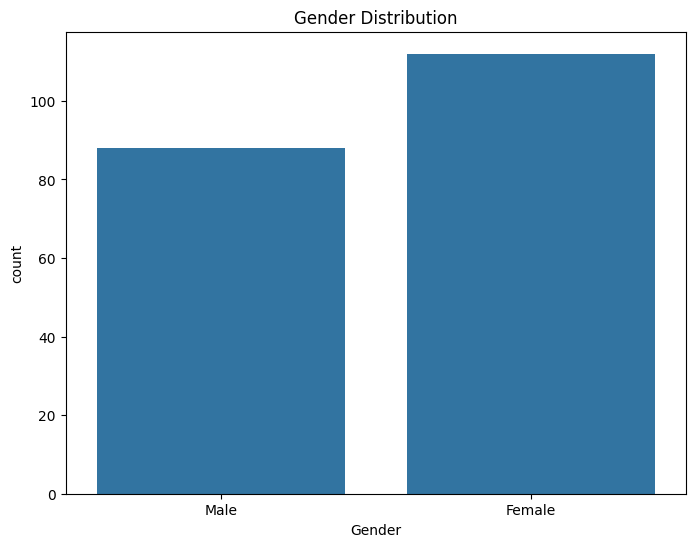

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

From the data there is slightly more females than males. Nothing out of the ordinary. 

#### Correlations

Now lets make a correlation heatmap that will help us find relationships between factors.

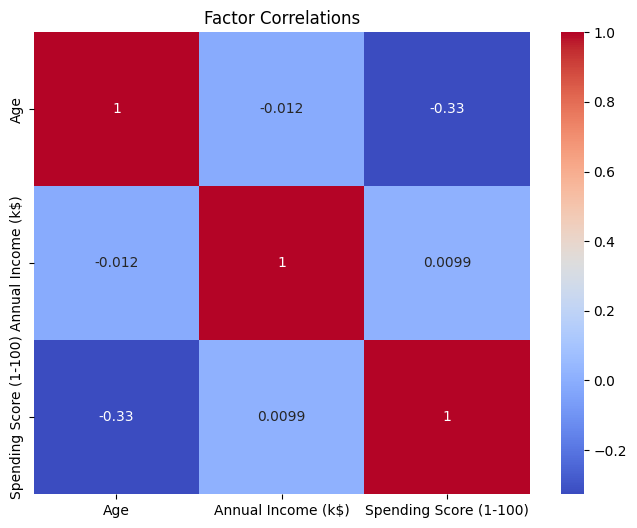

In [8]:
plt.figure(figsize=(8,6))
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Factor Correlations')
plt.show()

Okay this correlation hitmap really does not give us any information. There are zero meaningful relationships in the data to base our analysis off of. This is perfect though for clustering methods.

## Modeling

We are now ready to apply our unsupervised machine learning model to group customers into useful groups. The method we are going to use is the KMeans clustering and then compare it with Agglomerative clustering. We will evaluate the performance of each . Our data set does not have a truth source to it, so we will be using a silhouette score as an interal metric to evaluate the clustering quality. 

We want a silhouette score that is close to 1. If its 0 then its alright because their are some overlaps. Negative values are horrible and the model did not work. 

#### Preprocessing

In [9]:
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### KMeans Clustering

Now we will perform KMeans clustering. The first iteration will use a value of 5 for k.

In [10]:
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_scaled)

Lets see the score.

In [11]:
kmeans_silhouette_5 = silhouette_score(X_scaled, kmeans_labels)
print("Standard KMeans Silhouette Score:", round(kmeans_silhouette_5, 4))

Standard KMeans Silhouette Score: 0.4094


The value isnt great, but it isnt horrible 

#### Optimizing 

Now lets try different values for k and try to further optimize the model. We will print a line graph with all the silhouette scores with the by their k values. 

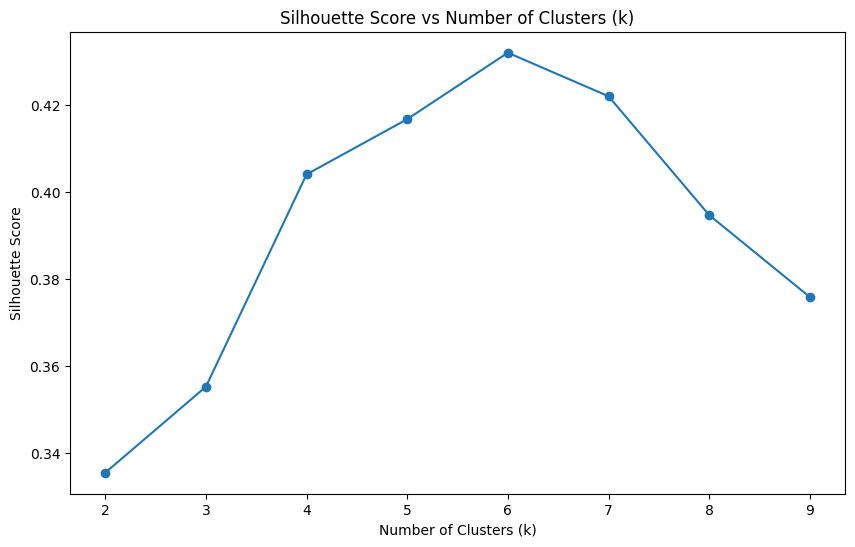

The best number of clusters is 6 and the silhouette score is 0.4319


In [15]:
silhouette_scores = []
k_values = range(2, 10)

best_score = -1
best_k = None
best_kmeans = None
best_kmeans_labels = None

for k in k_values:
    temp_kmeans = KMeans(n_clusters=k, random_state=15)
    temp_labels = temp_kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, temp_labels)
    silhouette_scores.append(score)

    if score > best_score:
        best_score = score
        best_k = k
        best_kmeans = temp_kmeans
        best_kmeans_labels = temp_labels

plt.figure(figsize=(10,6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

print("The best number of clusters is", best_k, "and the silhouette score is", round(best_score, 4))
best_kmeans_silhouette = best_score

#### Model Comparison 

Now we need to compare the KMeans model with the Agglomerative clustering model. Below is the code for this.

In [16]:
agglo = AgglomerativeClustering(n_clusters=best_k)
agglo_labels = agglo.fit_predict(X_scaled)
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)

print("Agglomerative Clustering Silhouette Score (k =", best_k,"):", round(agglo_silhouette, 4))

Agglomerative Clustering Silhouette Score (k = 6 ): 0.4201


#### Comparison Results

Kmeans had a better Silhouette score than Agglomerative clustering since it was higher. These numbers are hard to understand, so I think it would be best to visualize the groups on a graph. If our models are working we should see clusters of similar data grouped together. From our Silhouette scores there should be some overlap between the different groups, but nothing to be concerned about.

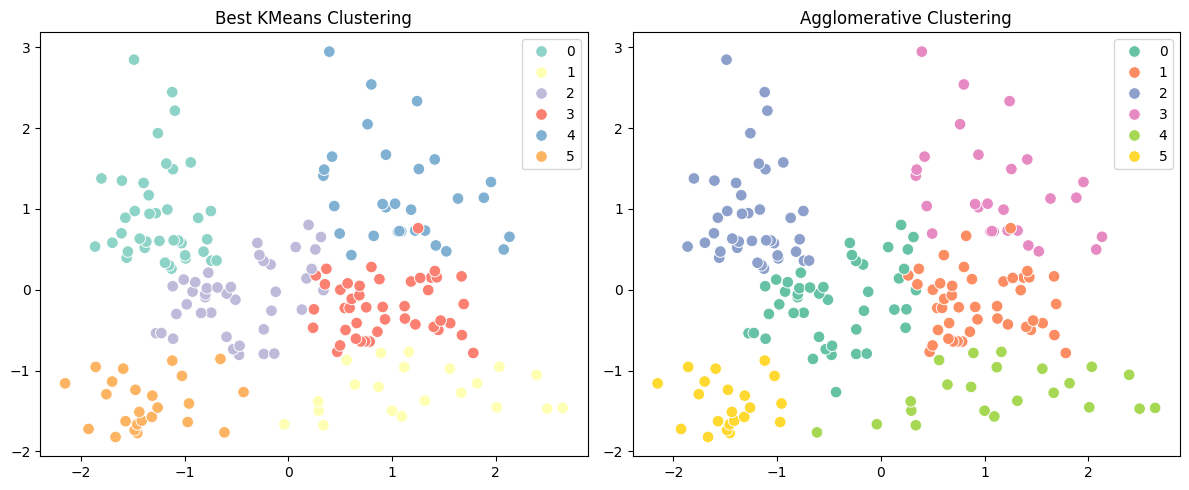

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=best_kmeans_labels, palette='Set3', s=70)
plt.title('Best KMeans Clustering')

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=agglo_labels, palette='Set2', s=70)
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()


As you can see from the graphs the clustering seemed to work well. There is definitely some overlap between groups, but overally they have their distinct areas. Visually it is hard to see a clear difference between the two models used, but using the results from the Silhouette test we get KMeans as the better model. 

## Conclusion 

This project set the goal to group mall customers together based on their characteristic using unsupervised learning models. Grouping customers wold help businesses target them with advertisments that would get better responses. 

In this project we explored the data and eventually applied two different unsupervised machine learning models which were Kmeans Clustering and Agglomerative Clustering. We optimized the results and found that Kmeans Clustering gave better results with a Silhouette value of 0.4319 vs 0.3665 from Agglomerative clustering. After optimizing the models we then compared them visually and both showed some overlap between groups, but there was no visual difference between the two graphs. 

Overall, the results from this lab were great. After looking at the cluster graphs there are clearly defined groups that businesses can use to target them with advertisments and products with higher sucesses rates. There is still some overlap and in the future we would like to have more factors for each customer to help improve the models. 